In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D
from sklearn.metrics import accuracy_score

In [2]:
train_data_dir = 'C:/Users/Anita/Desktop/cats/train/'
valid_data_dir = 'C:/Users/Anita/Desktop/cats/validation/'
test_data_dir = 'C:/Users/Anita/Desktop/cats/test/'
h, w = 128, 128 # Image size (height and width) to resize images to
batch_size = 8 # Number of samples per batch
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)      
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_flow = train_generator.flow_from_directory(train_data_dir, 
                                                 target_size=(h,w), 
                                                 batch_size=batch_size,
                                                class_mode="binary")
valid_flow = valid_generator.flow_from_directory(valid_data_dir, 
                                                 target_size=(h,w),
                                                 batch_size=batch_size,
                                                class_mode="binary") 



test_flow = test_generator.flow_from_directory(test_data_dir, 
                                                 target_size=(h,w), 
                                                 batch_size=batch_size,
                                                class_mode="binary",
                                               shuffle = False,
                                              )

Found 103 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [3]:
# Initialize a sequential model
model=Sequential()   
# Add the first convolutional layer
model.add(Conv2D(32, 3, activation='relu', input_shape=[h, w, 3]))
# Conv2D: 32 filters, kernel size 3x3, ReLU activation
# input_shape: (height, width, 3) where 3 represents RGB channels
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))  
# Randomly drops 50% of neurons during training to improve generalization
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# Flatten the output of the convolutional layers to a 1D vector
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add the output layer with a single neuron for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor = "val_loss", patience = 3, restore_best_weights=True)

# summary of the model architecture
model.summary()
history = model.fit(train_flow, validation_data = valid_flow, callbacks=[early_stopping], epochs=100)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0

In [5]:
y_pred = (model.predict(test_flow).flatten() >0.5).astype('int') 
accuracy = accuracy_score(test_flow.classes, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9167


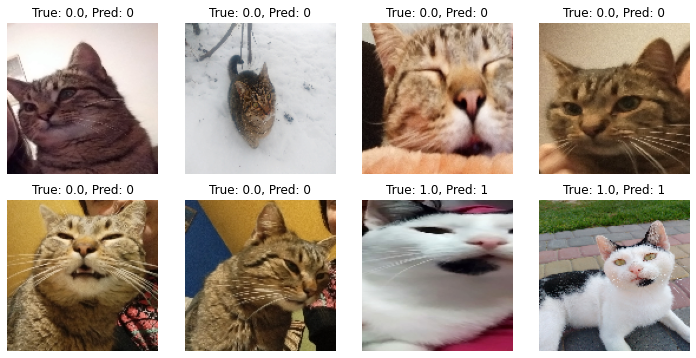

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img


x_test, y_test = next(test_flow)
predictions = model.predict(x_test)


plt.figure(figsize=(10, 10))
for i in range(8):  
    plt.subplot(4, 4, i + 1)  #  2x2 grid
    img = array_to_img(x_test[i])  # covert to image
    true_label = y_test[i]  
    predicted_label = (predictions[i] > 0.5).astype('int')  

    plt.imshow(img)
    plt.title(f"True: {true_label}, Pred: {predicted_label[0]}")  
    plt.axis('off')
    
plt.tight_layout()
plt.show()
